<a href="https://colab.research.google.com/github/moizahmed813/CODSOFT/blob/main/Titanic%20Survival%20Prediction/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all necessary classes
import pandas as pnd
import seaborn as sbrn
import numpy as nmp

%matplotlib inline
from matplotlib import pyplot as pplt
from matplotlib import style

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

In [ ]:
# Reading from the given dataset
tested_df = pnd.read_csv("tested.csv")

In [ ]:
# Viewing information available in the dataset
print(tested_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [ ]:
# Viewing the description in the datasets to gain better insights.
print(tested_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [ ]:
print(tested_df.head(10))

In [ ]:
# Finding NaN (Not a Number) values in the dataframe
missing_data = tested_df.isnull()
missing_count = tested_df.isnull().sum()
missing_percentage = (tested_df.isnull().sum() / len(tested_df)) * 100
missing_info = pnd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percentage": missing_percentage
})
print(missing_info)


             Missing Count  Missing Percentage
PassengerId              0            0.000000
Survived                 0            0.000000
Pclass                   0            0.000000
Name                     0            0.000000
Sex                      0            0.000000
Age                     86           20.574163
SibSp                    0            0.000000
Parch                    0            0.000000
Ticket                   0            0.000000
Fare                     1            0.239234
Cabin                  327           78.229665
Embarked                 0            0.000000


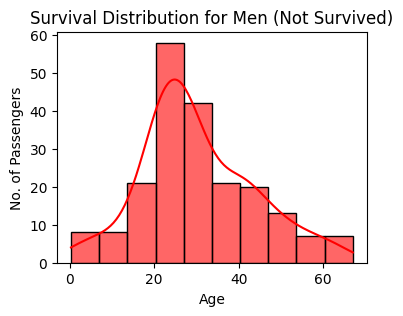

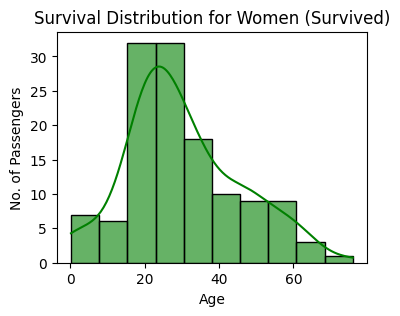

In [ ]:
df = pnd.read_csv("tested.csv")

# Filtering data for men who did not survived and women who survived
survived_men_data = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]
survived_women_data = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]

# Creating a survival plot for not survived men
pplt.figure(figsize=(4,3))
sbrn.histplot(data=survived_men_data, x='Age', bins=10, color='red', alpha=0.6, kde=True)
pplt.title('Survival Distribution for Men (Not Survived)')
pplt.xlabel('Age')
pplt.ylabel('No. of Passengers')
pplt.show()

# Creating a survival plot for survived women
pplt.figure(figsize=(4,3))
sbrn.histplot(data=survived_women_data, x='Age', bins=10, color='green', alpha=0.6, kde=True)
pplt.title('Survival Distribution for Women (Survived)')
pplt.xlabel('Age')
pplt.ylabel('No. of Passengers')
pplt.show()


<Figure size 400x300 with 0 Axes>

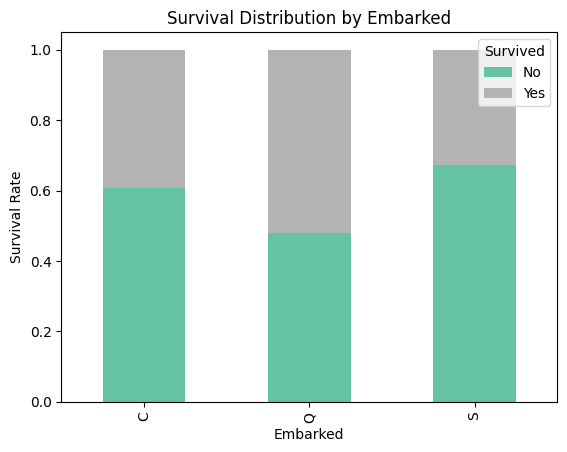

In [ ]:
# We will first group the data by "Embarked" and "Survived", then calculate the count of survivors and non-survivors for each port, and then normalize the data to obtain survival rates.
df = pnd.read_csv("tested.csv")
grouped_data = df.groupby(['Embarked', 'Survived']).size().unstack()

# Normalizing the data to get survival rates
grouped_data_normalized = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Creating a stacked bar plot for Embarked and Survival
pplt.figure(figsize=(4, 3))
grouped_data_normalized.plot(kind='bar', stacked=True, colormap='Set2')
pplt.title('Survival Distribution by Embarked')
pplt.xlabel('Embarked')
pplt.ylabel('Survival Rate')
pplt.legend(title='Survived', labels=['No', 'Yes'])
pplt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

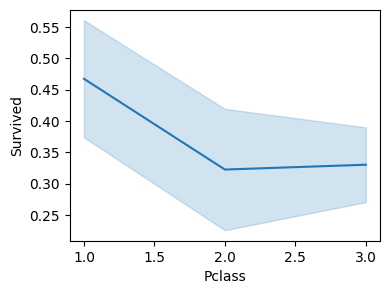

In [ ]:
# Creating a Line plot to represent survival rate with respect to PClass
pplt.figure(figsize=(4, 3))
sbrn.lineplot(x='Pclass', y='Survived', data=tested_df)

In [ ]:
# Finding whether someone on the ship is alone or is with relatives
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['TravelStatus'] = df['FamilySize'].apply(lambda size: 'Alone' if size == 1 else 'With Relatives')
print(df[['SibSp', 'Parch', 'FamilySize', 'TravelStatus']])


     SibSp  Parch  FamilySize    TravelStatus
0        0      0           1           Alone
1        1      0           2  With Relatives
2        0      0           1           Alone
3        0      0           1           Alone
4        1      1           3  With Relatives
..     ...    ...         ...             ...
413      0      0           1           Alone
414      0      0           1           Alone
415      0      0           1           Alone
416      0      0           1           Alone
417      1      1           3  With Relatives

[418 rows x 4 columns]


In [ ]:
# Generating random ages to fill the missing values
missing_age_indices = df[df['Age'].isnull()].index
for index in missing_age_indices:
    random_age = nmp.random.uniform(df['Age'].min(), df['Age'].max())
    df.loc[index, 'Age'] = random_age
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  FamilySize    TravelStatus  
0   330911   7.8292   NaN        Q           1           Alone  
1   363272   7.0000   NaN        S           2  With Relatives  
2   240276   9.6875   NaN        Q           1           Alone  
3   315154   8.6625   NaN        S           1  

In [ ]:
# Filling missing value in Fare
tested_df['Fare'].describe()
value = '17.152'
data = [tested_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(value)
print(df.head(155))

In [ ]:
# Dropping columns having unique values because they are tricky to convert.
unique_column = df.columns[df.nunique() == df.shape[0]]
df = df.drop(columns=unique_column)
print(df.head())


In [ ]:
# Filling Cabin column

# Extracting the deck information from the Cabin column (assuming the deck is the first letter)
df['Deck'] = df['Cabin'].str.extract(r'([A-G])', expand=False)
df['Cabin'] = df['Cabin'].fillna(0)

# Converting deck letters to numeric values
deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['Deck'] = df['Deck'].map(deck_mapping)

# Filling missing deck values with zero
df['Deck'] = df['Deck'].fillna(0).astype(int)

# Displaying the updated dataframe
print(df.head())

In [ ]:
# Checking if 'Name' column exists before dropping
if 'Name' in df.columns:
    df.drop(columns=['Name'], inplace=True)

# Displaying the updated dataframe
print(df.head())


In [ ]:
# Performing conversion of features to numerics

# Converting "Sex" column to numerics
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})

# Creating a mapping for "Embarked" values to numerics
embarked_mapping = {'C': 0, 'S': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].replace(embarked_mapping)

# Creating a mapping for "TravelStatus" values to numerics
travel_status_mapping = {'With Relatives': 1, 'Alone': 0}
df['TravelStatus'] = df['TravelStatus'].replace(travel_status_mapping)

# Converting "Fare" column from float to int and deal with NaN values
df['Fare'] = df['Fare'].fillna(0).astype(int)

# Converting "Age" column from float to int.
df['Age'] = df['Age'].fillna(0).astype(int)
df.head()

In [ ]:
# Checking if 'Ticket' column exists before dropping
if 'Ticket' in df.columns:
    df.drop(columns=['Ticket'], inplace=True)

# Checking if 'Cabin' column exists before dropping
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,TravelStatus,Deck
0,892,0,3,1,34,0,0,7,2,1,0,0
1,893,1,3,0,47,1,0,7,1,2,1,0
2,894,0,2,1,62,0,0,9,2,1,0,0
3,895,0,3,1,27,0,0,8,1,1,0,0
4,896,1,3,0,22,1,1,12,1,3,1,0


Accuracy: 1.0


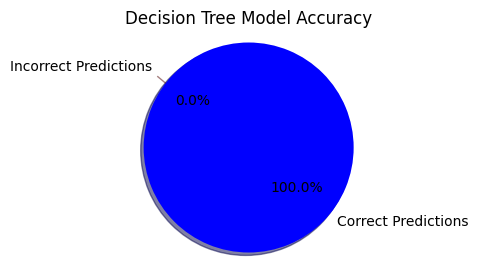

In [ ]:
# Using machine learning model i.e. Decision Tree for survival prediction
features = ['Sex', 'Age', 'Fare', 'Pclass']
X = df[features]
y = df['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

# Visualize the accuracy using a pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [accuracy, 1 - accuracy]
colors = ['blue', 'red']
explode = (0.1, 0)
pplt.figure(figsize=(4, 3))
pplt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
pplt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pplt.title('Decision Tree Model Accuracy')
pplt.show()
